In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df= pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#Exploratary Data Analysis
df.shape

(200, 5)

In [4]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [5]:
df.nunique()

Unnamed: 0    200
TV            190
radio         167
newspaper     172
sales         121
dtype: int64

In [6]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
columns = ['TV','radio','newspaper']

<AxesSubplot:xlabel='TV', ylabel='Density'>

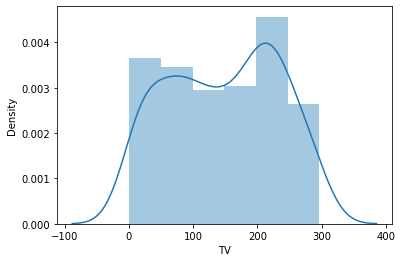

In [11]:
sn.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

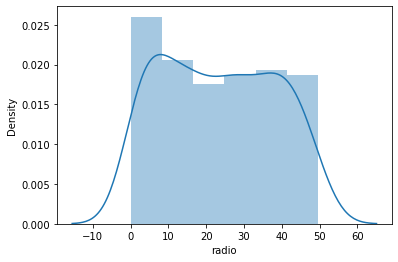

In [12]:
sn.distplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

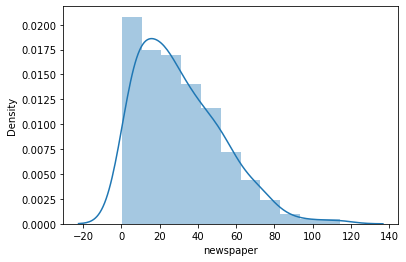

In [13]:
sn.distplot(df['newspaper'])

<AxesSubplot:xlabel='TV'>

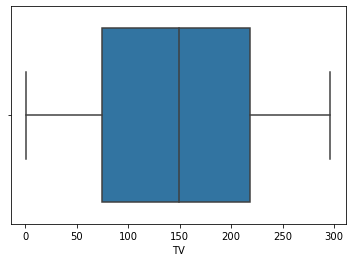

In [14]:
sn.boxplot(df['TV'])

<AxesSubplot:xlabel='radio'>

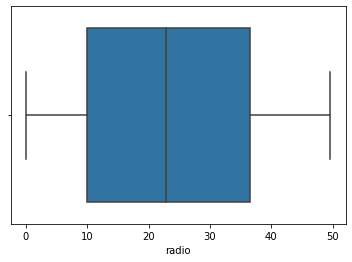

In [15]:
sn.boxplot(df['radio'])

<AxesSubplot:xlabel='newspaper'>

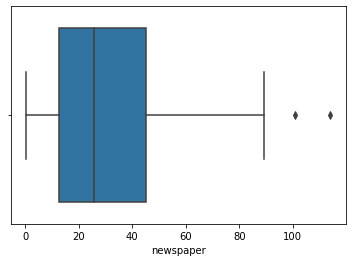

In [16]:
sn.boxplot(df['newspaper'])

In [17]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

<AxesSubplot:title={'center':'Comparision between TV and Sales'}, xlabel='TV', ylabel='sales'>

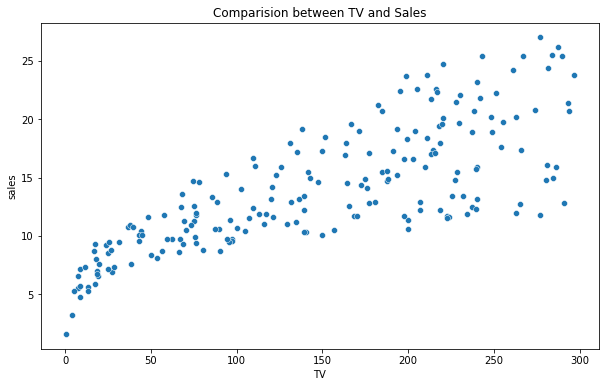

In [18]:
#Bivariate analysis
plt.figure(figsize=[10,6])
plt.title("Comparision between TV and Sales")
sn.scatterplot(df['TV'],df['sales'])

<AxesSubplot:title={'center':'Comparision between Radio and Sales'}, xlabel='radio', ylabel='sales'>

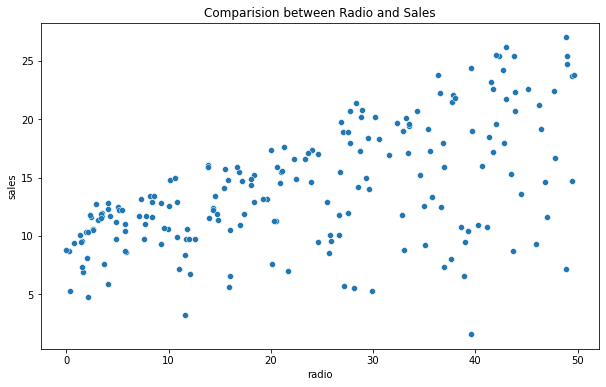

In [19]:
plt.figure(figsize=[10,6])
plt.title("Comparision between Radio and Sales")
sn.scatterplot(df['radio'],df['sales'])

<AxesSubplot:title={'center':'Comparision between Newspaper and Sales'}, xlabel='newspaper', ylabel='sales'>

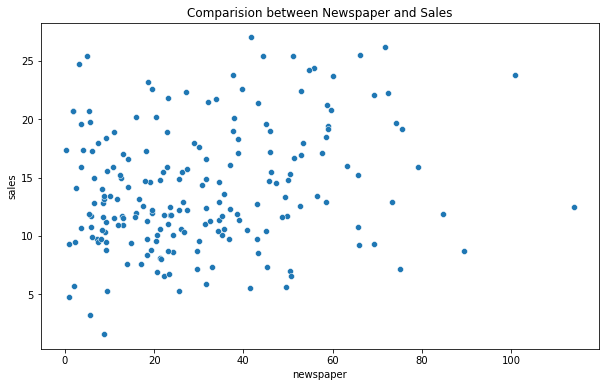

In [20]:
plt.figure(figsize=[10,6])
plt.title("Comparision between Newspaper and Sales")
sn.scatterplot(df['newspaper'],df['sales'])

<AxesSubplot:>

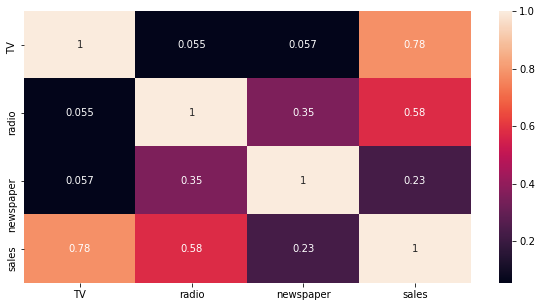

In [21]:
cor=df.corr()
plt.figure(figsize=(10,5))
sn.heatmap(df.corr(),annot=True)

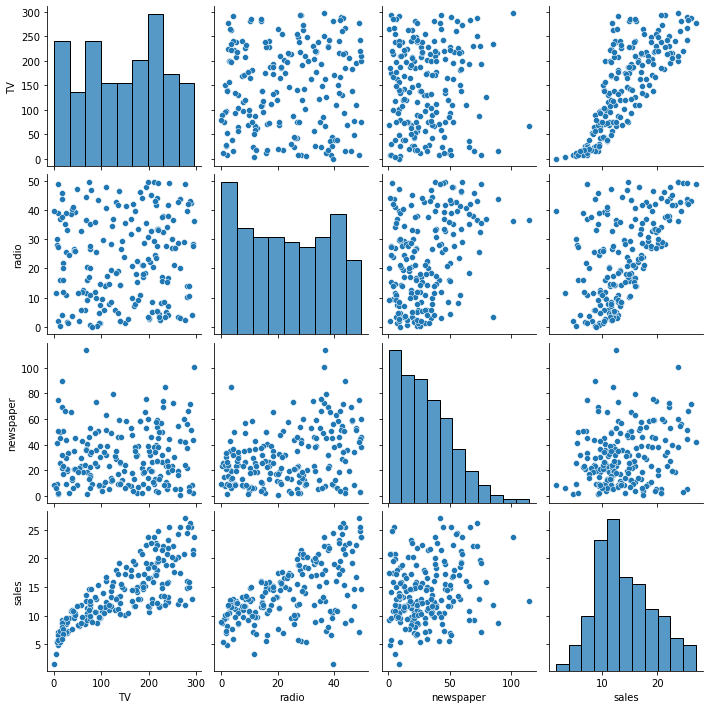

In [22]:
sn.pairplot(df)

In [23]:
Q1 = df['newspaper'].quantile(0.25)
Q3 = df['newspaper'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
df_iqr = df[(df['newspaper']>lower_lim)&(df['newspaper']<upper_lim)]
df_iqr.shape

(198, 4)

<AxesSubplot:xlabel='newspaper'>

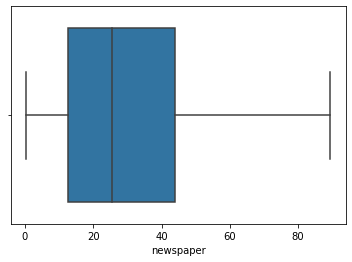

In [24]:
sn.boxplot(df_iqr['newspaper'])

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_zscore=df[(z<3).all(axis=1)]
df_zscore.shape

(198, 4)

<AxesSubplot:xlabel='newspaper'>

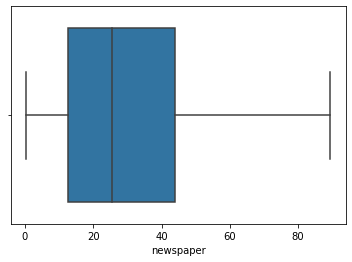

In [26]:
sn.boxplot(df_zscore['newspaper'])

In [27]:
df_iqr.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [28]:
df_zscore.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [29]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
dfpt=pt.fit_transform(df_zscore)
df_zscore=pd.DataFrame(dfpt,columns=df_zscore.columns)

In [30]:
df_zscore.skew()

TV          -0.320682
radio       -0.236668
newspaper   -0.101288
sales       -0.007573
dtype: float64

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

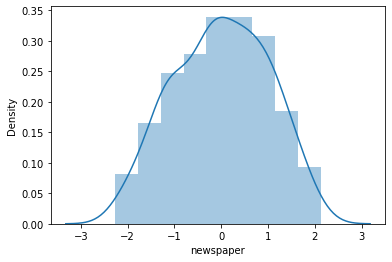

In [31]:
sn.distplot(df_zscore['newspaper'])

In [32]:
df_zscore.head()

,TV,radio,newspaper,sales
0,0.955983,0.969110,1.604196,1.476664
1,-1.192003,1.046234,0.831044,-0.645180
2,-1.646125,1.372968,1.607052,-0.889458
3,0.142934,1.147332,1.283768,0.892431
4,0.456452,-0.735026,1.280622,-0.127879


In [33]:
y = df_zscore['sales']
x = df_zscore
x.drop('sales',axis = 1, inplace = True)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lr = LinearRegression()
lr.fit(X_train,y_train)
pred= lr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)


r2score= 0.8989352111755063
Mean absolute error =  0.23960063196900602
Mean Squared error =  0.10557375779189045
Root Mean Sqaured Error=  0.3249211562700872


In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
cv_score = cross_val_score(lr,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.8985582344321443

In [38]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred= dtr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.9511293478504123
Mean absolute error =  0.1810957090015563
Mean Squared error =  0.05105099860379741
Root Mean Sqaured Error=  0.2259446804060618


In [39]:
cv_score = cross_val_score(dtr,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.9394117132636085

In [40]:
from sklearn.ensemble import RandomForestRegressor
  
rfr = RandomForestRegressor(n_estimators = 100, random_state = 12)
rfr.fit(X_train, y_train) 
pred= rfr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.9769589516709241
Mean absolute error =  0.1197990322004527
Mean Squared error =  0.024069016359291706
Root Mean Sqaured Error=  0.15514192328088403


In [41]:
cv_score = cross_val_score(rfr,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.9671372560962528

In [42]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha= 0.1,random_state= 0)
lasso.fit(X_train, y_train) 
pred= lasso.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.8873394393429539
Mean absolute error =  0.25984491205755555
Mean Squared error =  0.11768687078701914
Root Mean Sqaured Error=  0.34305520078701496


In [43]:
cv_score = cross_val_score(lasso,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.8812499559762047

In [44]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train, y_train) 
pred= knr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.8925019609440652
Mean absolute error =  0.2458882901508429
Mean Squared error =  0.11229402515353548
Root Mean Sqaured Error=  0.33510300678080385


In [45]:
cv_score = cross_val_score(knr,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.9209074256403668

In [46]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha= 0.001,random_state= 0)
ridge.fit(X_train, y_train) 
pred= ridge.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.8989337771129534
Mean absolute error =  0.2396023132843146
Mean Squared error =  0.10557525583462496
Root Mean Sqaured Error=  0.324923461502282


In [47]:
cv_score = cross_val_score(ridge,x,y,cv=3)
cv_mean = cv_score.mean()
cv_mean

0.8996055994715814

In [48]:
from sklearn.model_selection import GridSearchCV

parameter = { 'fit_intercept' : ['True','False'],
               'normalize' : ['True','False'],
               'n_jobs' : [42,-1,-10,1,10,100,200,500,35,25]
             }

In [49]:
GCV = GridSearchCV(LinearRegression(),parameter,cv =5)

GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': ['True', 'False'],
                         'n_jobs': [42, -1, -10, 1, 10, 100, 200, 500, 35, 25],
                         'normalize': ['True', 'False']})

In [50]:
GCV.best_params_

{'fit_intercept': 'True', 'n_jobs': 42, 'normalize': 'True'}

In [51]:
Final_mod = LinearRegression(fit_intercept='True',normalize='True',n_jobs=42)
Final_mod.fit(X_train,y_train)
pred = Final_mod.predict(X_test)
r2=r2_score(y_test,pred)
cv_score = cross_val_score(Final_mod,x,y,cv=5)
cv_mean = cv_score.mean()
print(r2,cv_mean)

0.8989352111755063 0.8985582344321446


In [52]:
#Saving the model
import joblib
joblib.dump(Final_mod,"AdvertisementSales.pkl")

['AdvertisementSales.pkl']